In [3]:
import pandas as pd
import numpy as np

### Content base Movie Recommendation System

In [4]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [5]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
credits.head(1)['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

## Step 1 : Merge 2 data frame (on the basis of title)

In [7]:
movies = movies.merge(credits,on='title')

In [8]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


#### Deciding the important columns


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [10]:
# for content base we need this columns which will make our model more efficient

# generes
# id
# keyword
# title
# overview because of content base Rec
# cast 
# crew


In [11]:
cont_movies = movies[['id', 'genres','title','overview','keywords','cast','crew']]

In [12]:
cont_movies.head()

,id,genres,title,overview,keywords,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Data preprocessing

Removing missing data

In [13]:
cont_movies.isnull().sum()

id          0
genres      0
title       0
overview    3
keywords    0
cast        0
crew        0
dtype: int64

In [14]:
cont_movies.dropna(inplace=True)

C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\1925364384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies.dropna(inplace=True)


In [15]:
cont_movies.isnull().sum()


id          0
genres      0
title       0
overview    0
keywords    0
cast        0
crew        0
dtype: int64

In [16]:
movies.shape

(4809, 23)

In [17]:
cont_movies.shape

(4806, 7)

Now we will make the proper format of data in columns 

In [18]:
cont_movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
# '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
# convert it into ['action', 'adventure'....]


In [20]:
for i in cont_movies['genres']:
    print(i['name'])

TypeError: string indices must be integers

In [21]:
names = cont_movies['genres'].apply(lambda x: x['name']).tolist()

TypeError: string indices must be integers

In [22]:
# import ast
# ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [23]:
#string indices must be integers

# this erros means that we need to convert this string of list into the list

import ast

def convert(obj):
    L =[]
    for i in ast.literal_eval(obj):
        L.append(i["name"])
    return L

In [24]:
cont_movies['genres'] = cont_movies['genres'].apply(convert)

C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\622023010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies['genres'] = cont_movies['genres'].apply(convert)


In [25]:
cont_movies['keywords'] = cont_movies['keywords'].apply(convert)


C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\138787543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies['keywords'] = cont_movies['keywords'].apply(convert)


In [26]:
cont_movies.head()


,id,genres,title,overview,keywords,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,"In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[Action, Adventure, Crime]",Spectre,A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[Action, Adventure, Science Fiction]",John Carter,"John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
cont_movies['cast']

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4804    [{"cast_id": 1, "character": "El Mariachi", "c...
4805    [{"cast_id": 1, "character": "Buzzy", "credit_...
4806    [{"cast_id": 8, "character": "Oliver O\u2019To...
4807    [{"cast_id": 3, "character": "Sam", "credit_id...
4808    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4806, dtype: object

In [28]:
def convert3(obj):
    L =[]
    counter = 0
    
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i["name"])
            counter += 1
        else:
            break
    return L


In [29]:
cont_movies['cast'].apply(convert3)


0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [30]:
cont_movies['cast'] = cont_movies['cast'].apply(convert3)


C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\902679503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies['cast'] = cont_movies['cast'].apply(convert3)


In [31]:
cont_movies

,id,genres,title,overview,keywords,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,"In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[Action, Adventure, Crime]",Spectre,A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[Action, Adventure, Science Fiction]",John Carter,"John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]",El Mariachi,El Mariachi just wants to play his guitar and ...,"[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,"[Comedy, Romance]",Newlyweds,A newlywed couple's honeymoon is upended by th...,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"[Comedy, Drama, Romance, TV Movie]","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [32]:
#now we will work on crew column

In [33]:
def fetch_director(obj):
    L =[]
    
    
    for i in ast.literal_eval(obj):
        if i['job'] == "Director":
            L.append(i["name"])
            break
    return L

In [36]:
cont_movies['crew'] = cont_movies['crew'].apply(fetch_director)

C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\2686708648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies['crew'] = cont_movies['crew'].apply(fetch_director)


In [39]:
cont_movies['overview'][0] #it is string so to concat with other column convert it into the list

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [40]:
cont_movies['overview'].apply(lambda x:x.split())

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

In [41]:
cont_movies['overview'] = cont_movies['overview'].apply(lambda x:x.split())


C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\3521499771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies['overview'] = cont_movies['overview'].apply(lambda x:x.split())


In [42]:
cont_movies['genres'].apply(lambda x:[i.replace(" ", "")for i in x])

0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4804                       [Action, Crime, Thriller]
4805                               [Comedy, Romance]
4806               [Comedy, Drama, Romance, TVMovie]
4807                                              []
4808                                   [Documentary]
Name: genres, Length: 4806, dtype: object

In [43]:
cont_movies['genres'] = cont_movies['genres'].apply(lambda x:[i.replace(" ", "")for i in x])
cont_movies['keywords'] = cont_movies['keywords'].apply(lambda x:[i.replace(" ", "")for i in x])
cont_movies['cast'] = cont_movies['cast'].apply(lambda x:[i.replace(" ", "")for i in x])
cont_movies['crew'] = cont_movies['crew'].apply(lambda x:[i.replace(" ", "")for i in x])


C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\8770916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies['genres'] = cont_movies['genres'].apply(lambda x:[i.replace(" ", "")for i in x])
C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\8770916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies['keywords'] = cont_movies['keywords'].apply(lambda x:[i.replace(" ", "")for i in x])
C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\8770916.py:3: SettingWithCopyWarning: 
A

In [44]:
cont_movies

,id,genres,title,overview,keywords,cast,crew
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,"[Action, Adventure, Crime]",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,"[Action, Adventure, ScienceFiction]",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]
...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]",El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez]
4805,72766,"[Comedy, Romance]",Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns]
4806,231617,"[Comedy, Drama, Romance, TVMovie]","Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith]
4807,126186,[],Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia]


In [45]:
cont_movies["tag"] = cont_movies["overview"]  + cont_movies["genres"] +cont_movies["keywords"]   + cont_movies["cast"]+ cont_movies["crew"]   

C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\1297442059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_movies["tag"] = cont_movies["overview"]  + cont_movies["genres"] +cont_movies["keywords"]   + cont_movies["cast"]+ cont_movies["crew"]


In [46]:
cont_movies

,id,genres,title,overview,keywords,cast,crew,tag
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[Action, Adventure, Crime]",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,"[Action, Adventure, ScienceFiction]",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...
4804,9367,"[Action, Crime, Thriller]",El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,"[Comedy, Romance]",Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"[Comedy, Drama, Romance, TVMovie]","Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,[],Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],"[When, ambitious, New, York, attorney, Sam, is..."


In [47]:
new_df = cont_movies[['id', 'title','tag']]

In [49]:
new_df

,id,title,tag
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [51]:
new_df['tag'].apply(lambda x:" ".join(x))   

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tag, Length: 4806, dtype: object

In [56]:
new_df['tag'] = new_df['tag'].apply(lambda x:" ".join(x))   


C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\658131664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag'] = new_df['tag'].apply(lambda x:" ".join(x))


In [58]:
new_df.head()

,id,title,tag
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [59]:
new_df['tag'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [72]:
import nltk 

In [73]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [78]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [80]:
new_df['tag'] = new_df['tag'].apply(stem)

C:\Users\Meet Desai\AppData\Local\Temp\ipykernel_9612\4074900442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag'] = new_df['tag'].apply(stem)


In [81]:
# now we will convert it into the text vectorization for rec system 
# most used or repitative words or common words we will take top 5000 words we will take 
# word 1 = action
# word 2 = drama
# .
# .
# .
# .
# word 5000= salman khan (e.g)

# we will make 5000*5000 table and it is our vector

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
cv = CountVectorizer(max_features= 5000 , stop_words= 'english')

In [84]:
cv.fit_transform(new_df['tag']).toarray().shape

(4806, 5000)

In [85]:
vectors =cv.fit_transform(new_df['tag']).toarray()
 

In [86]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [90]:
# now we will calculate distance between vectors
# for that we will use cosine distacne technique
# why cosine : because we need to sind f=diference beween the angle 
# when ever you work with higher dimension data use cosine never use euclidean distance
# why not eucladian : because in eucladian it will calculate the distance of tip of the vector


In [92]:
from sklearn.metrics.pairwise import cosine_similarity
# WHY COSINE SIMILARITY bcz cosine similarity  is always give o/p bw 0 and 1 in which 0 means it is closer while 1 means it is far 

In [93]:
cosine_similarity(vectors)

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [94]:
cosine_similarity(vectors).shape

(4806, 4806)

In [95]:
similarities = cosine_similarity(vectors)
 

In [96]:
similarities[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

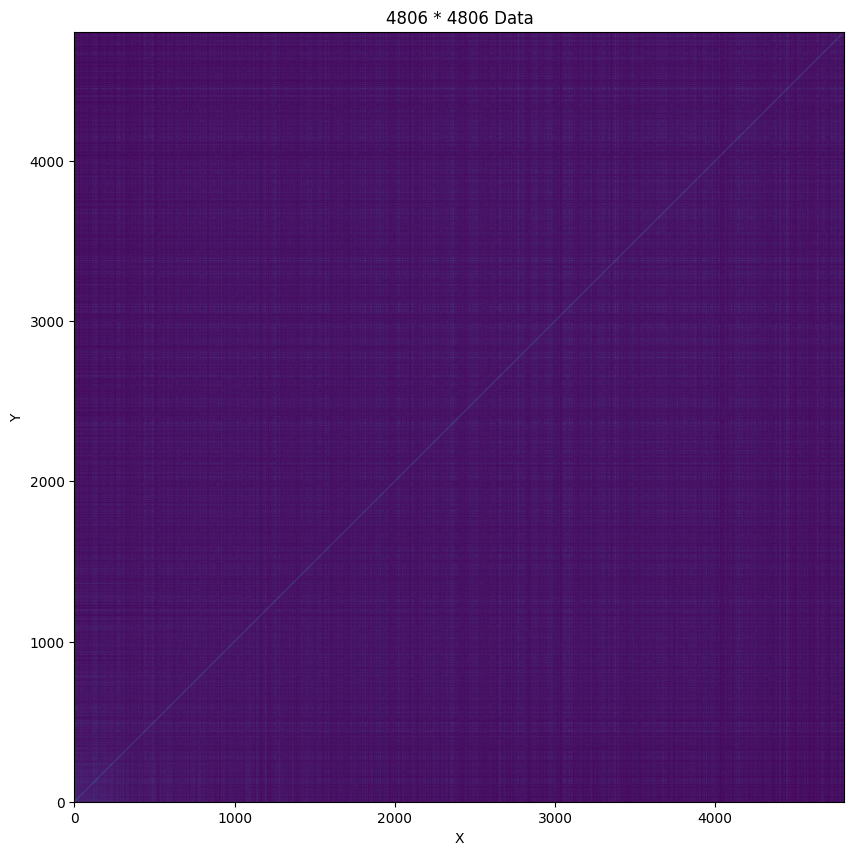

In [99]:
import matplotlib.pyplot as plt

# Create an array of 5000 * 5000
data = similarities

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Set the x- and y-limits of the axes object
ax.set_xlim([0, 4806])
ax.set_ylim([0, 4806])

# Plot the data on the axes object
ax.imshow(data)

# Set the title and labels of the plot
plt.title("4806 * 4806 Data")
plt.xlabel("X")
plt.ylabel("Y")

# Show the plot
plt.show()

## Recomandation genrator

In [107]:
a= similarities[new_df[new_df['title'] == 'Batman'].index[0]]

In [111]:
sorted(a, reverse=True)

[1.0,
 0.9428090415820631,
 0.4114755998989118,
 0.3340765523905305,
 0.3250056229832958,
 0.32242634688922367,
 0.3019405424385589,
 0.2850620368313788,
 0.28005601680560194,
 0.2787473366690303,
 0.2777777777777778,
 0.27638539919628335,
 0.2749859704614352,
 0.271244490402245,
 0.2683281572999748,
 0.26741915107947334,
 0.2645751311064591,
 0.26352313834736496,
 0.26306839575082347,
 0.26190476190476186,
 0.26190476190476186,
 0.26111648393354675,
 0.2608360150191666,
 0.25973124082465987,
 0.259160527674408,
 0.25660011963983365,
 0.2564945880212885,
 0.2545875386086578,
 0.2541642838876744,
 0.25383654128340477,
 0.253546276418555,
 0.2534210374499762,
 0.25182770057259657,
 0.2518277005725965,
 0.25160980414135625,
 0.251259453814803,
 0.24999999999999997,
 0.2487341690815455,
 0.2480694691784169,
 0.2480694691784169,
 0.24691458232921554,
 0.24659848095803594,
 0.2465984809580359,
 0.24595492912420727,
 0.2449894717530557,
 0.24295632895188748,
 0.24283093212859136,
 0.242821465

In [128]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distance = similarities[movie_index]
    movie_list = sorted(list(enumerate(distance)),reverse=True, key= lambda x:x[1])[0:6]

    for i in movie_list:
        print(new_df.iloc[i[0]].title) 

In [129]:
recommend('Batman')

Batman
Batman
Batman & Robin
Batman Begins
Batman Returns
The R.M.


In [119]:
new_df.iloc[119]

id                                                     272
title                                        Batman Begins
tag      driven by tragedy, billionair bruce wayn dedic...
Name: 119, dtype: object

In [ ]:
import pickle 